<a href="https://colab.research.google.com/github/pardhu5779/E-commerce/blob/main/Customer_personality_analysis_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Objective ##

To explore customer behavior, spending habits, and campaign performance using marketing data and derive actionable insights.

In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [30]:
df = pd.read_excel("marketing_campaign (1).xlsx")

In [31]:
# Basic info about dataset
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ID                   2240 non-null   int64         
 1   Year_Birth           2240 non-null   int64         
 2   Education            2240 non-null   object        
 3   Marital_Status       2240 non-null   object        
 4   Income               2216 non-null   float64       
 5   Kidhome              2240 non-null   int64         
 6   Teenhome             2240 non-null   int64         
 7   Dt_Customer          2240 non-null   datetime64[ns]
 8   Recency              2240 non-null   int64         
 9   MntWines             2240 non-null   int64         
 10  MntFruits            2240 non-null   int64         
 11  MntMeatProducts      2240 non-null   int64         
 12  MntFishProducts      2240 non-null   int64         
 13  MntSweetProducts     2240 non-nul

## Exploratory Data Analysis ##

In [32]:
# Check for missing values
print("\nMissing Values:")
print(df.isnull().sum())



Missing Values:
ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64


In [33]:
# Drop rows with missing values
df = df.dropna()

In [34]:
# Summary statistics
print("\nDescriptive Statistics:")
print(df.describe())


Descriptive Statistics:
                 ID   Year_Birth         Income      Kidhome     Teenhome  \
count   2216.000000  2216.000000    2216.000000  2216.000000  2216.000000   
mean    5588.353339  1968.820397   52247.251354     0.441787     0.505415   
min        0.000000  1893.000000    1730.000000     0.000000     0.000000   
25%     2814.750000  1959.000000   35303.000000     0.000000     0.000000   
50%     5458.500000  1970.000000   51381.500000     0.000000     0.000000   
75%     8421.750000  1977.000000   68522.000000     1.000000     1.000000   
max    11191.000000  1996.000000  666666.000000     2.000000     2.000000   
std     3249.376275    11.985554   25173.076661     0.536896     0.544181   

                         Dt_Customer      Recency     MntWines    MntFruits  \
count                           2216  2216.000000  2216.000000  2216.000000   
mean   2013-07-10 11:29:27.509025280    49.012635   305.091606    26.356047   
min              2012-07-30 00:00:00     0.0

In [35]:
# Data types
print("\nData Types:")
print(df.dtypes)


Data Types:
ID                              int64
Year_Birth                      int64
Education                      object
Marital_Status                 object
Income                        float64
Kidhome                         int64
Teenhome                        int64
Dt_Customer            datetime64[ns]
Recency                         int64
MntWines                        int64
MntFruits                       int64
MntMeatProducts                 int64
MntFishProducts                 int64
MntSweetProducts                int64
MntGoldProds                    int64
NumDealsPurchases               int64
NumWebPurchases                 int64
NumCatalogPurchases             int64
NumStorePurchases               int64
NumWebVisitsMonth               int64
AcceptedCmp3                    int64
AcceptedCmp4                    int64
AcceptedCmp5                    int64
AcceptedCmp1                    int64
AcceptedCmp2                    int64
Complain                        int64

Outliers in ID:
Series([], Name: ID, dtype: int64)



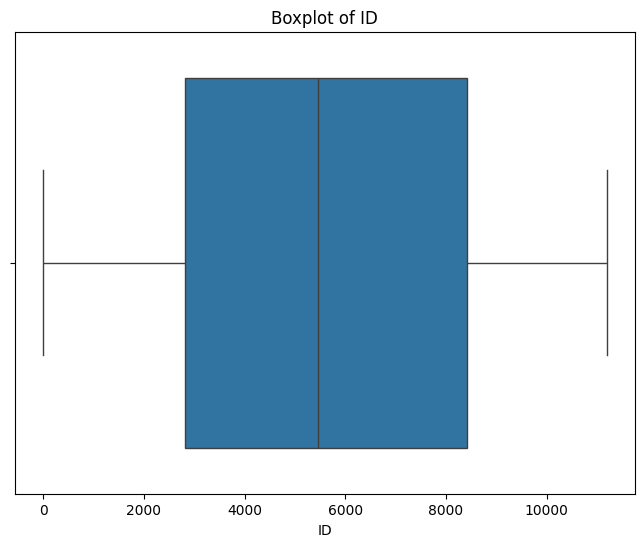

Outliers in Year_Birth:
192    1900
239    1893
339    1899
Name: Year_Birth, dtype: int64



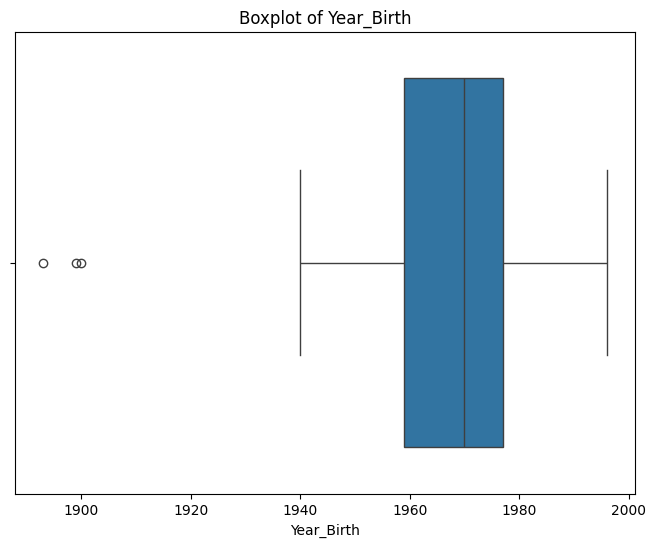

Outliers in Income:
164     157243.0
617     162397.0
655     153924.0
687     160803.0
1300    157733.0
1653    157146.0
2132    156924.0
2233    666666.0
Name: Income, dtype: float64



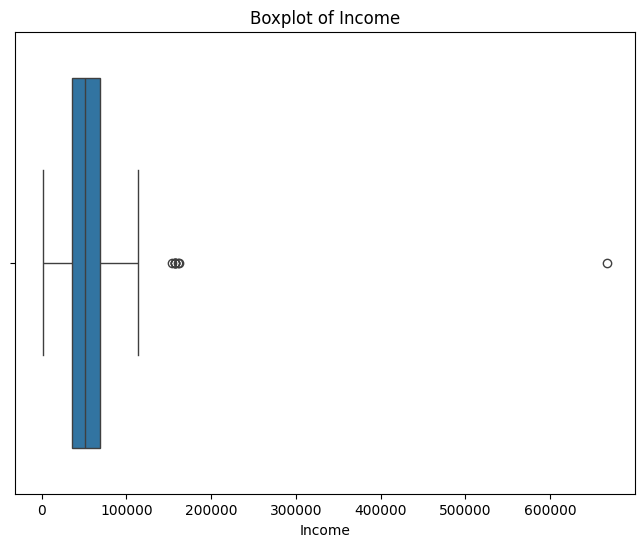

Outliers in Kidhome:
Series([], Name: Kidhome, dtype: int64)



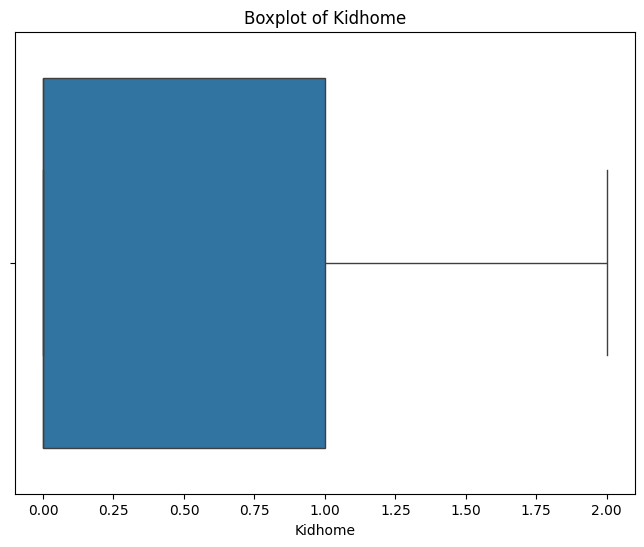

Outliers in Teenhome:
Series([], Name: Teenhome, dtype: int64)



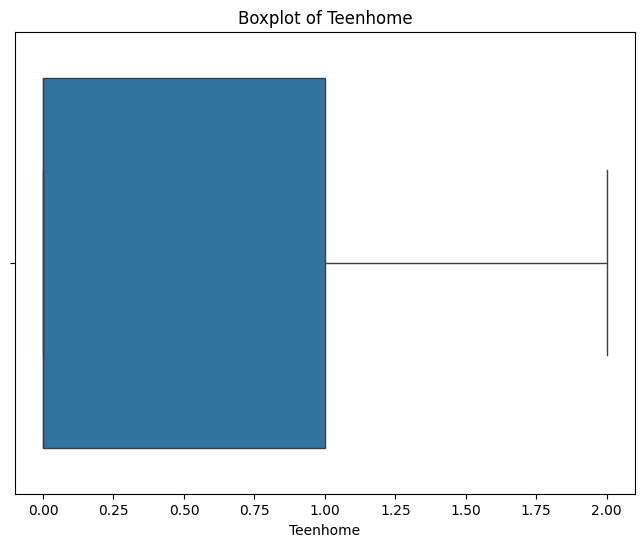

Outliers in Recency:
Series([], Name: Recency, dtype: int64)



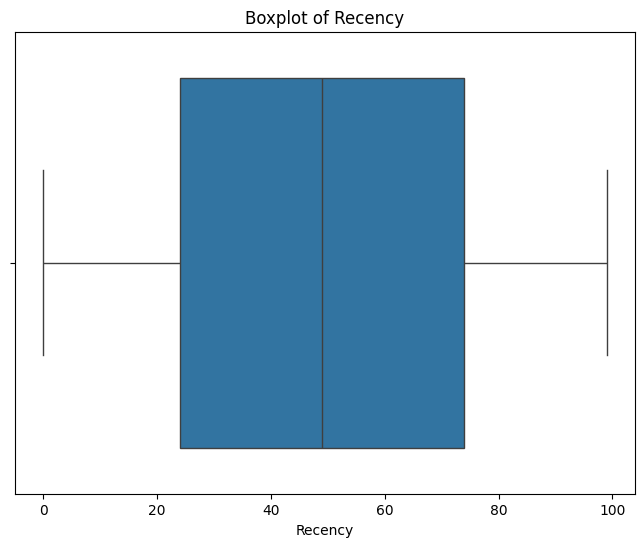

Outliers in MntWines:
111     1332
161     1349
295     1241
424     1285
430     1248
466     1239
497     1396
515     1288
523     1379
543     1478
559     1492
824     1492
826     1279
870     1308
917     1478
937     1253
987     1394
990     1296
1001    1285
1010    1230
1052    1315
1191    1298
1458    1302
1488    1449
1492    1259
1577    1252
1641    1459
1749    1493
1922    1324
1953    1285
1961    1462
1992    1276
2067    1245
2098    1486
2127    1311
Name: MntWines, dtype: int64



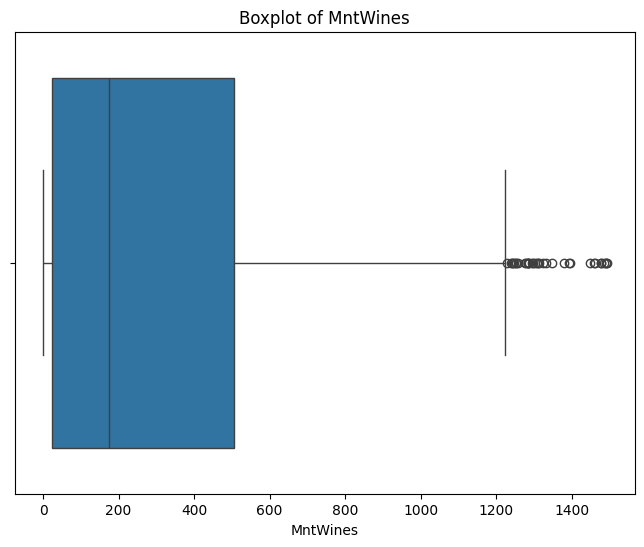

Outliers in MntFruits:
0        88
18       80
29      100
45      164
53      120
       ... 
2185    142
2194     80
2203    124
2206    129
2217    194
Name: MntFruits, Length: 246, dtype: int64



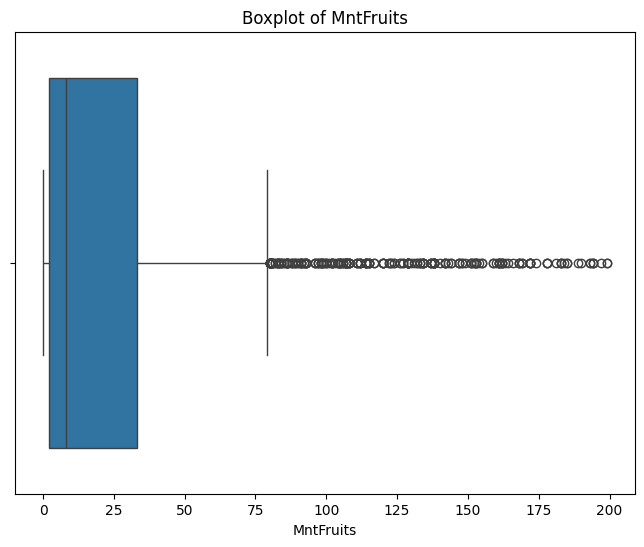

Outliers in MntMeatProducts:
21      1725
29       801
51       780
76       925
77       779
        ... 
2187     749
2190     655
2193     845
2211     860
2213     631
Name: MntMeatProducts, Length: 174, dtype: int64



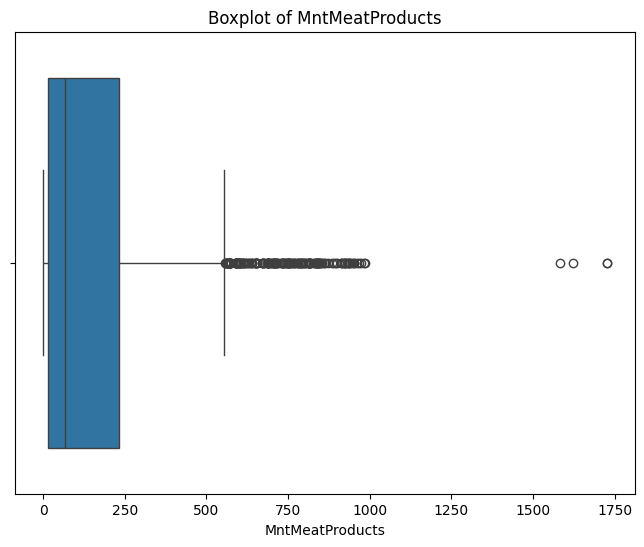

Outliers in MntFishProducts:
0       172
12      225
17      150
39      160
45      227
       ... 
2188    199
2190    145
2193    202
2206    182
2217    149
Name: MntFishProducts, Length: 222, dtype: int64



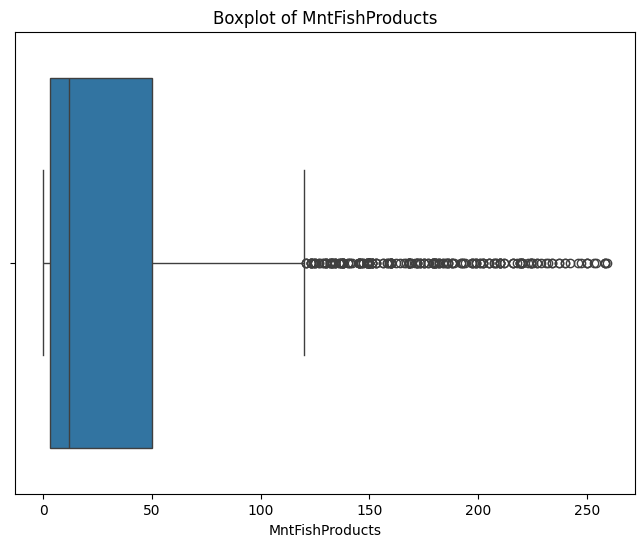

Outliers in MntSweetProducts:
0        88
12      112
40      178
51      167
55      120
       ... 
2175     92
2190    111
2193    133
2217    125
2235    118
Name: MntSweetProducts, Length: 246, dtype: int64



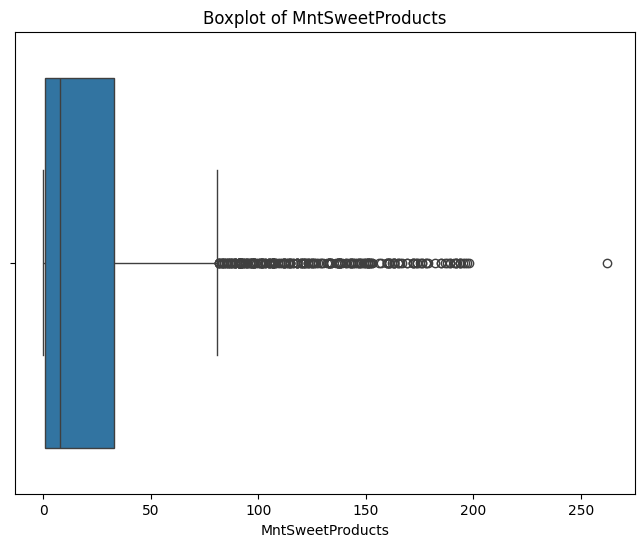

Outliers in MntGoldProds:
18      176
45      174
53      241
55      190
62      169
       ... 
2178    227
2188    163
2194    174
2198    152
2235    247
Name: MntGoldProds, Length: 205, dtype: int64



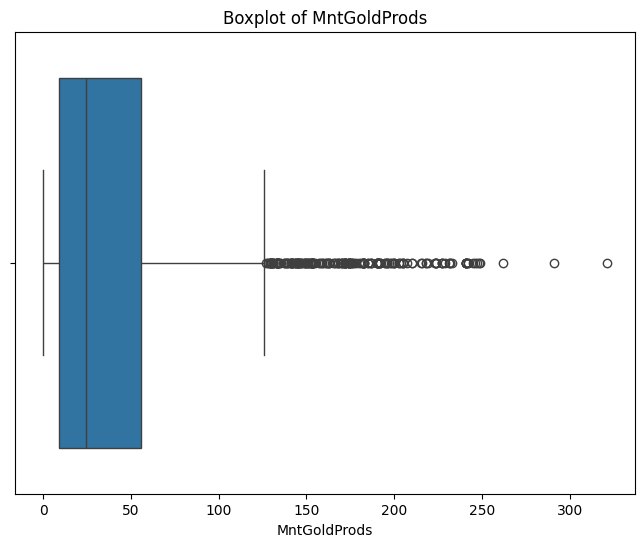

Outliers in NumDealsPurchases:
21      15
24       7
49       9
54       7
69       7
        ..
2090     7
2144     7
2198     7
2226     8
2236     7
Name: NumDealsPurchases, Length: 84, dtype: int64



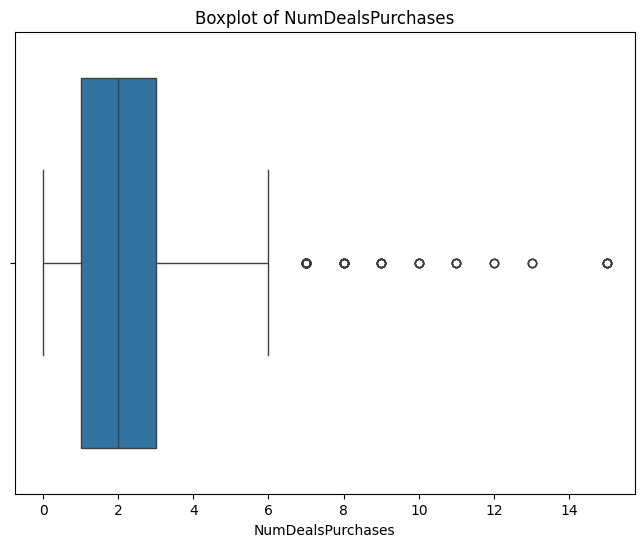

Outliers in NumWebPurchases:
1806    23
1898    27
1975    25
Name: NumWebPurchases, dtype: int64



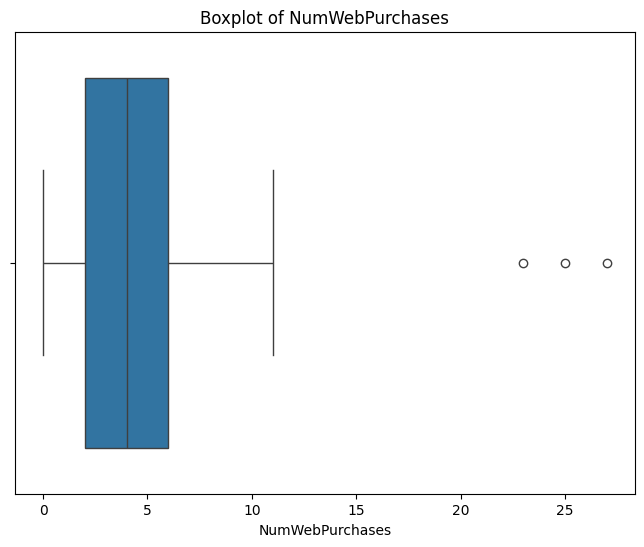

Outliers in NumCatalogPurchases:
21      28
104     11
164     22
288     11
586     11
591     11
627     11
636     11
687     28
764     11
777     11
934     11
984     11
1212    11
1452    11
1465    11
1492    11
1653    28
1745    11
1828    11
1906    11
1940    11
1958    11
Name: NumCatalogPurchases, dtype: int64



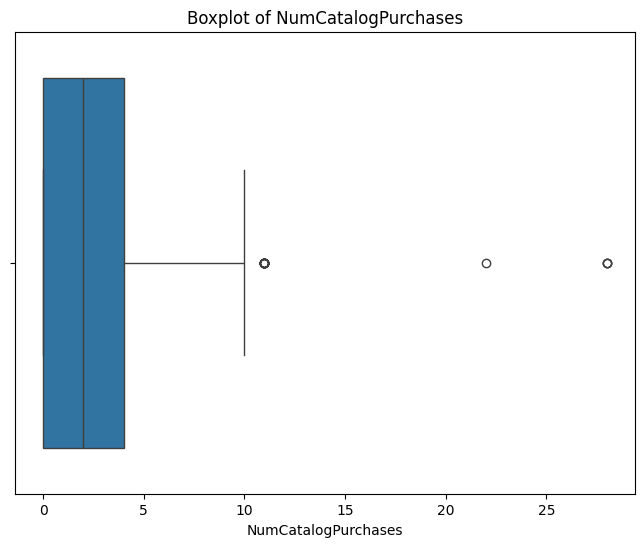

Outliers in NumStorePurchases:
Series([], Name: NumStorePurchases, dtype: int64)



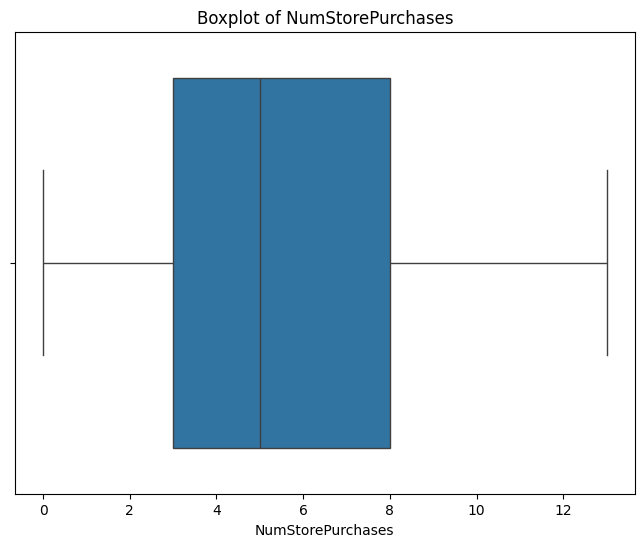

Outliers in NumWebVisitsMonth:
9       20
774     20
981     14
1042    19
1245    20
1328    17
1524    14
1846    19
Name: NumWebVisitsMonth, dtype: int64



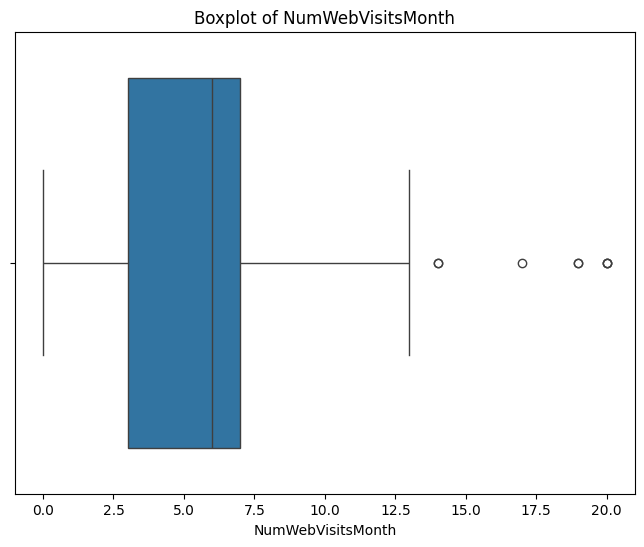

Outliers in AcceptedCmp3:
9       1
39      1
53      1
67      1
77      1
       ..
2194    1
2197    1
2198    1
2224    1
2230    1
Name: AcceptedCmp3, Length: 163, dtype: int64



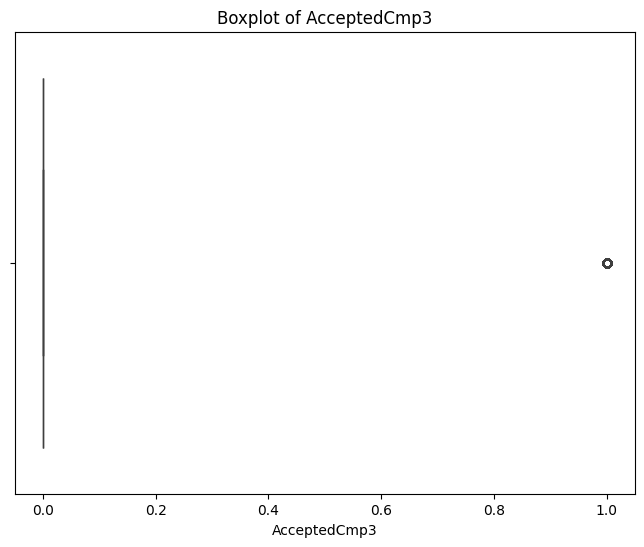

Outliers in AcceptedCmp4:
22      1
32      1
60      1
73      1
86      1
       ..
2185    1
2186    1
2207    1
2221    1
2237    1
Name: AcceptedCmp4, Length: 164, dtype: int64



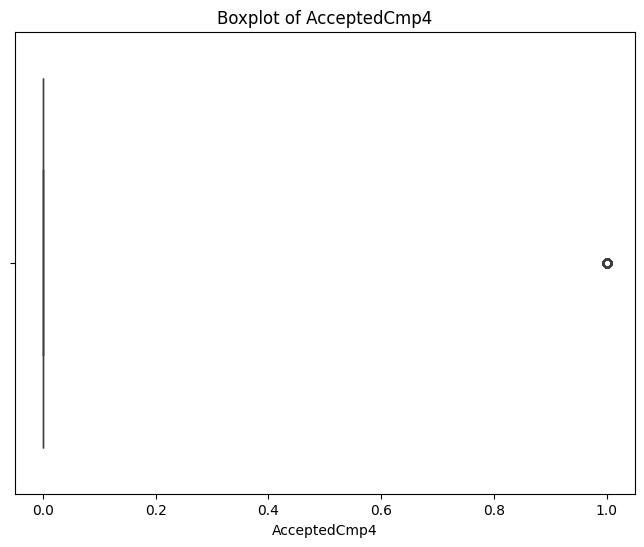

Outliers in AcceptedCmp5:
15      1
29      1
55      1
60      1
88      1
       ..
2168    1
2171    1
2175    1
2187    1
2221    1
Name: AcceptedCmp5, Length: 162, dtype: int64



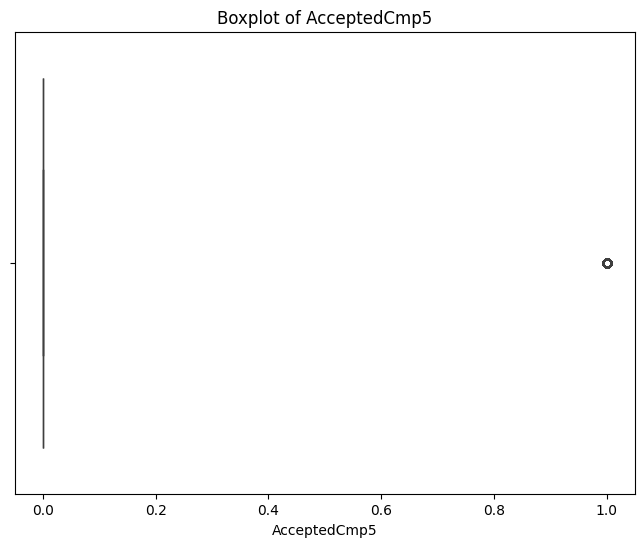

Outliers in AcceptedCmp1:
15      1
18      1
53      1
67      1
87      1
       ..
2168    1
2174    1
2175    1
2193    1
2236    1
Name: AcceptedCmp1, Length: 142, dtype: int64



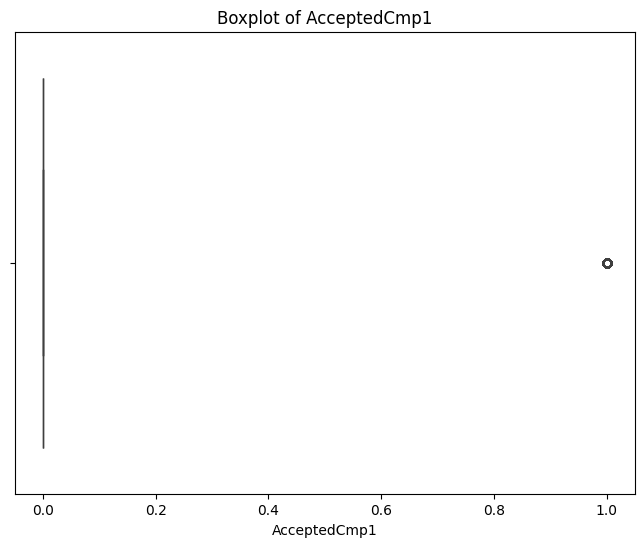

Outliers in AcceptedCmp2:
252     1
295     1
342     1
417     1
430     1
559     1
575     1
804     1
822     1
824     1
845     1
870     1
920     1
990     1
1087    1
1237    1
1281    1
1308    1
1462    1
1641    1
1687    1
1710    1
1915    1
1922    1
1926    1
1961    1
2099    1
2125    1
2167    1
2171    1
Name: AcceptedCmp2, dtype: int64



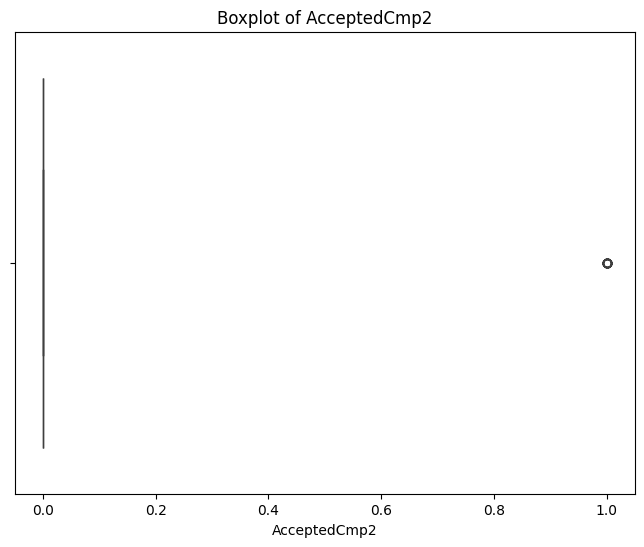

Outliers in Complain:
78      1
147     1
192     1
271     1
355     1
358     1
590     1
972     1
1041    1
1069    1
1180    1
1201    1
1211    1
1277    1
1323    1
1461    1
1571    1
1720    1
1850    1
1924    1
2018    1
Name: Complain, dtype: int64



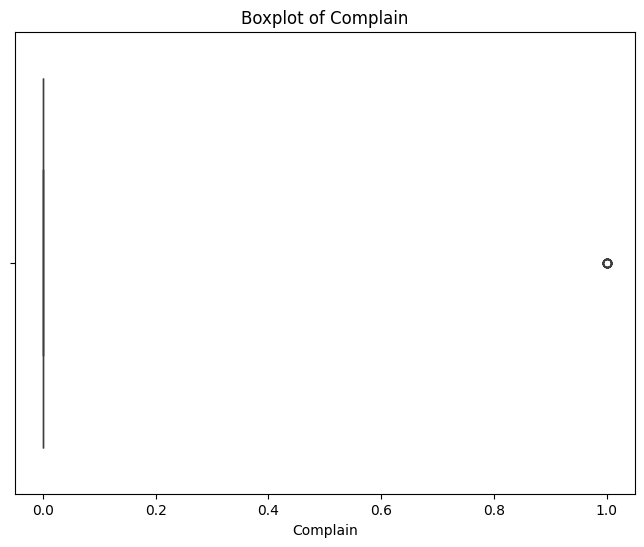

Outliers in Z_CostContact:
Series([], Name: Z_CostContact, dtype: int64)



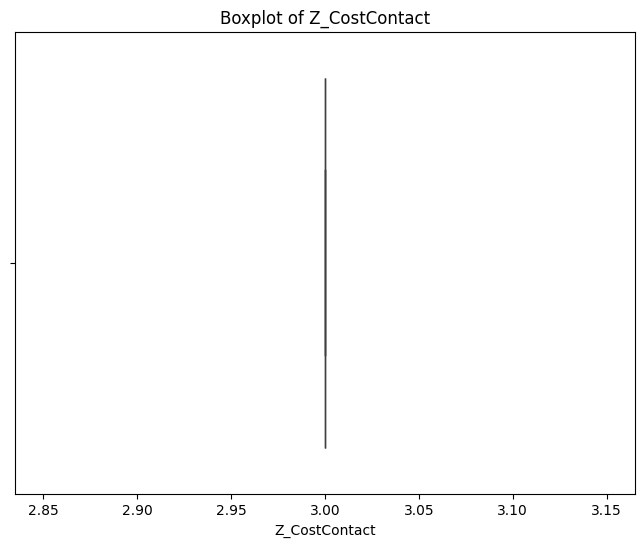

Outliers in Z_Revenue:
Series([], Name: Z_Revenue, dtype: int64)



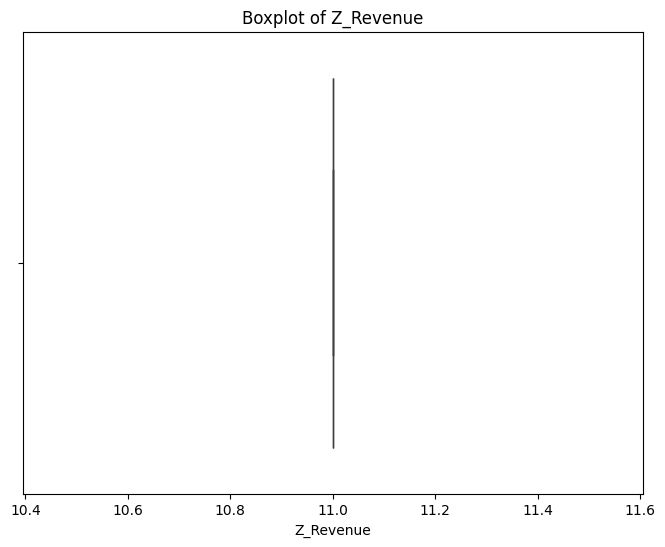

Outliers in Response:
0       1
8       1
15      1
33      1
39      1
       ..
2194    1
2198    1
2202    1
2221    1
2239    1
Name: Response, Length: 333, dtype: int64



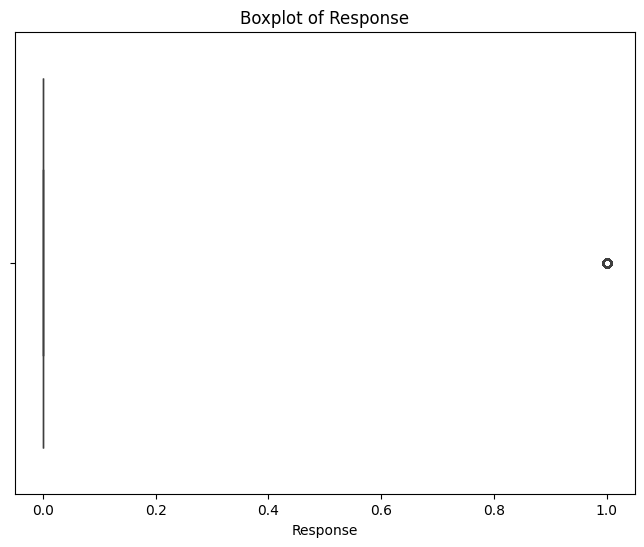

In [36]:
for col in df.select_dtypes(include=np.number).columns:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    print(f"Outliers in {col}:\n{outliers[col]}\n")


    plt.figure(figsize=(8, 6))
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col}')
    plt.show()


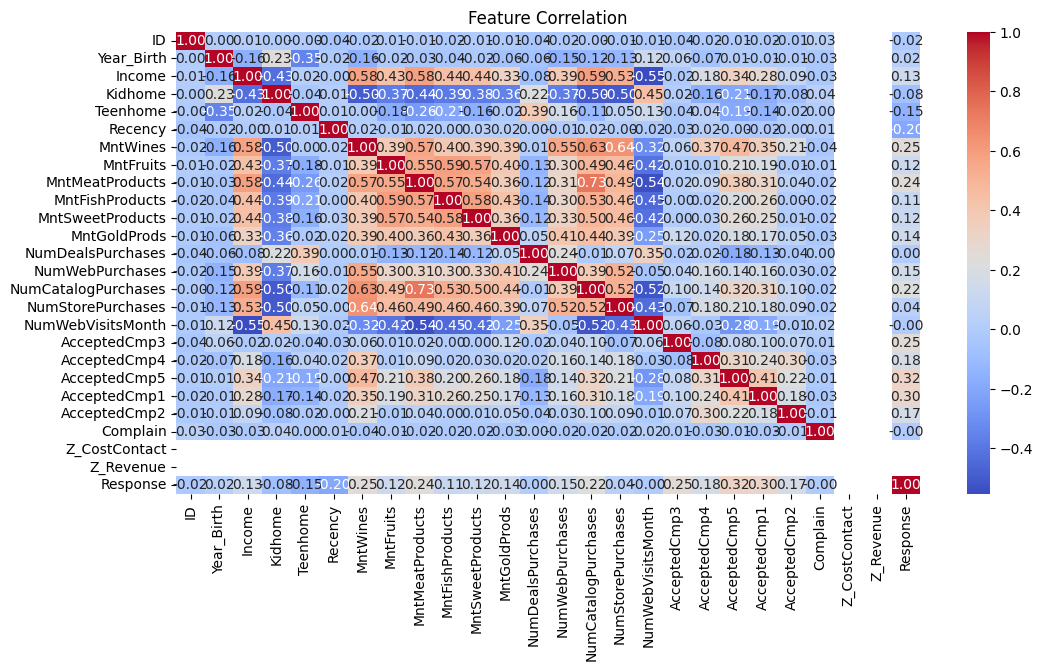

In [37]:
plt.figure(figsize=(12, 6))
sns.heatmap(df.select_dtypes(include=np.number).corr(), annot=True, cmap="coolwarm", fmt=".2f") # Select only numerical columns for correlation calculation
plt.title("Feature Correlation")
plt.show()

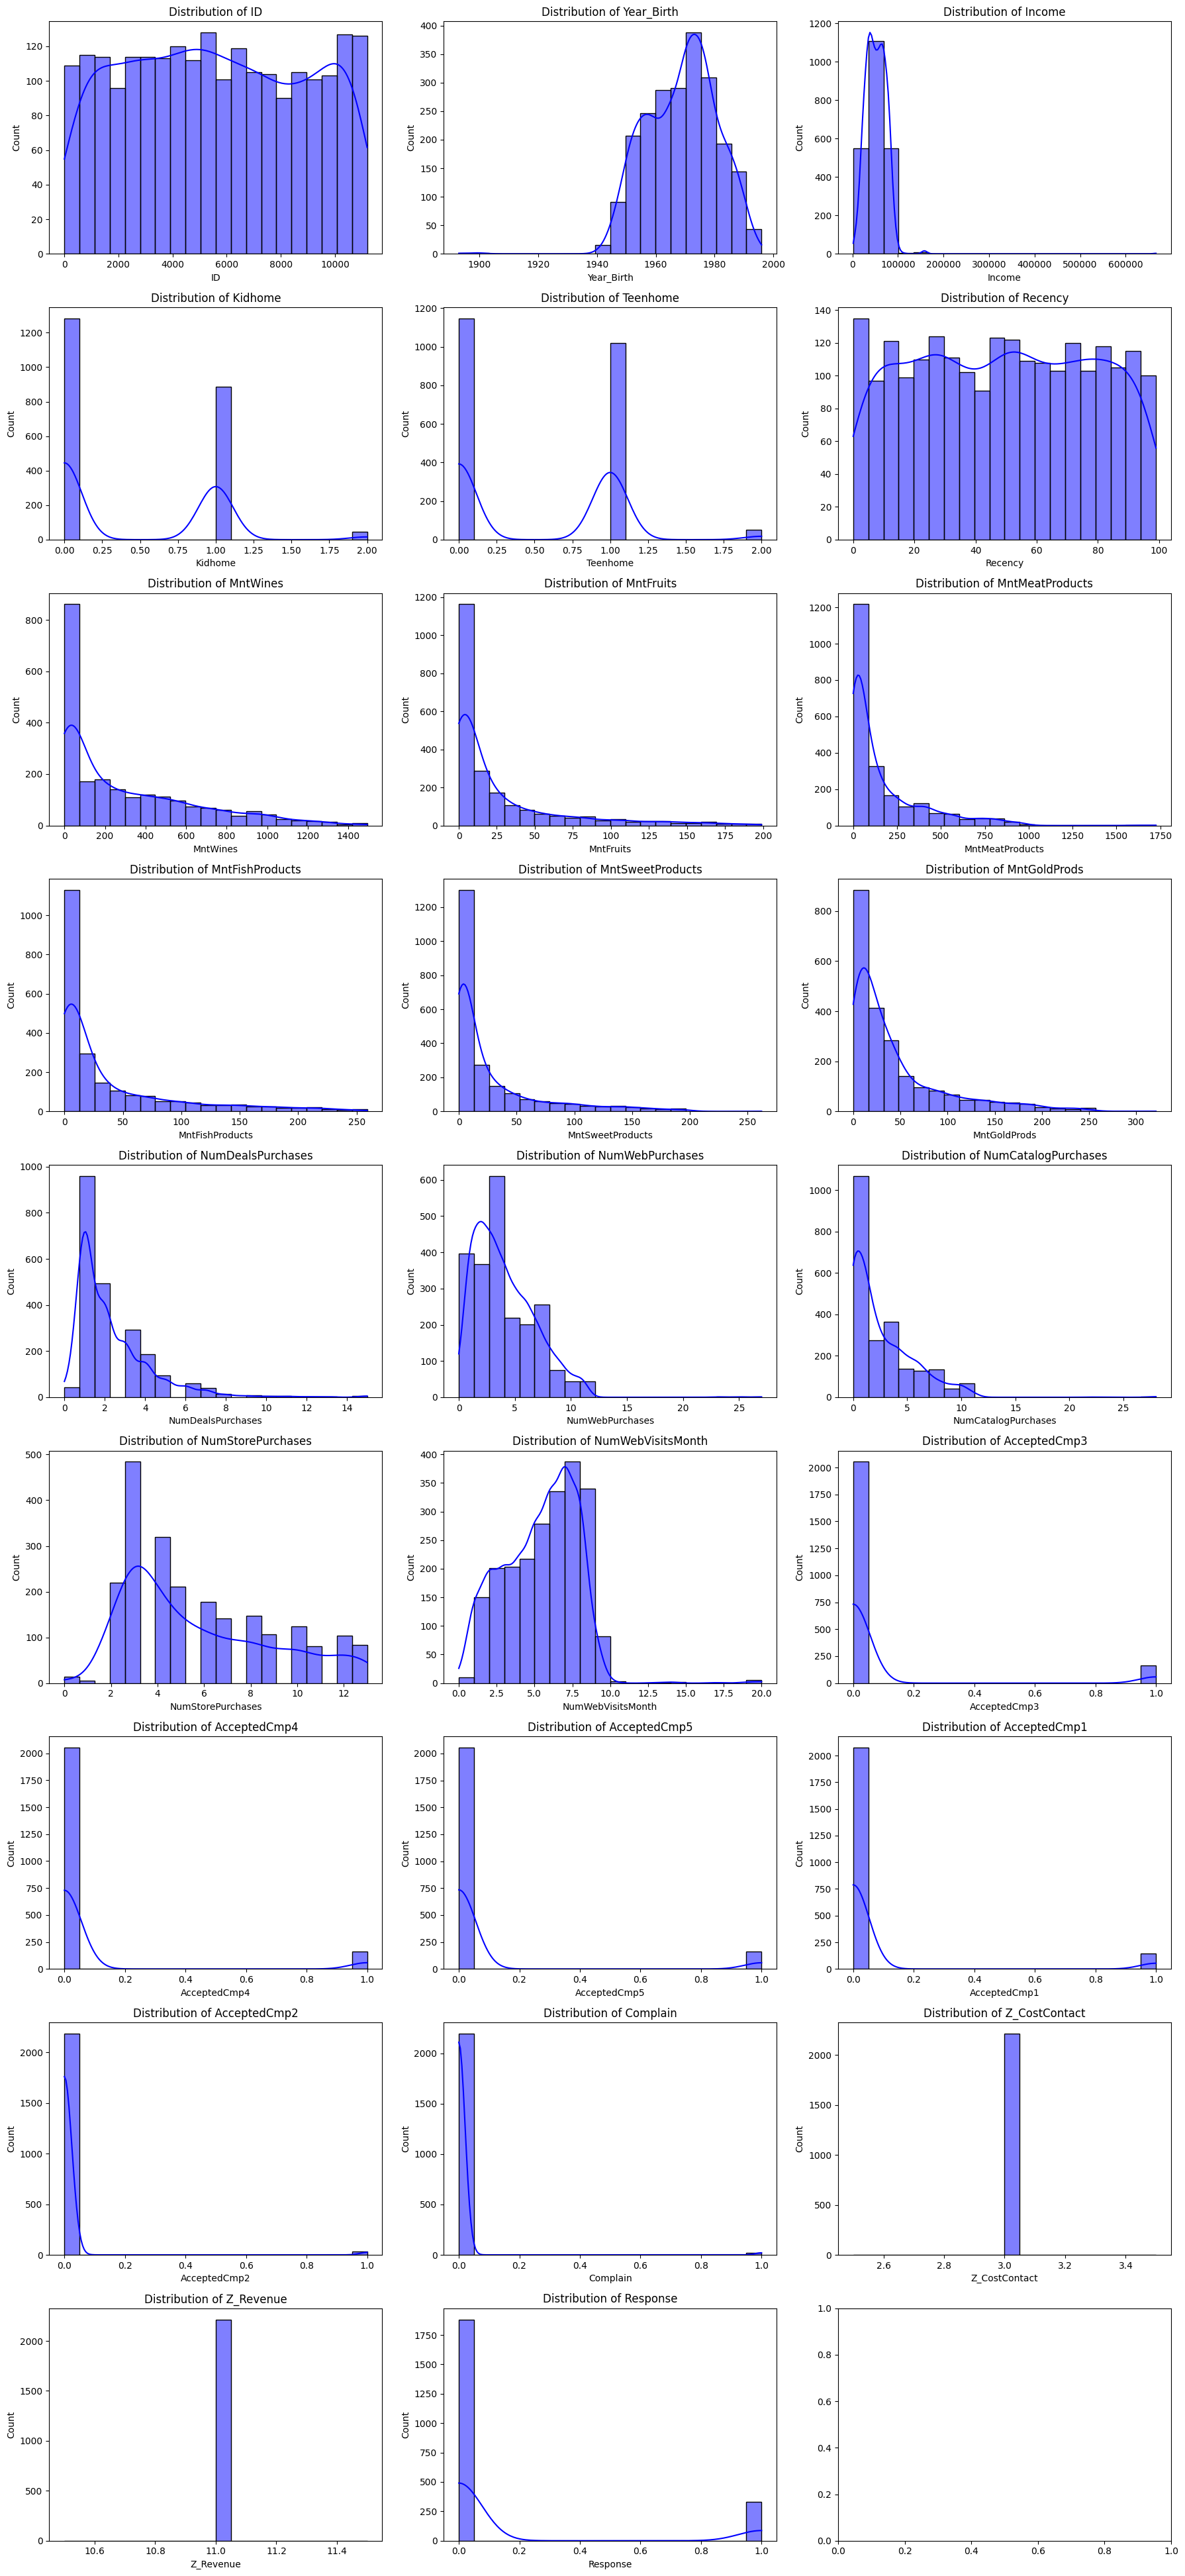

In [38]:
num_features = df.select_dtypes(include=["number"]).columns
num_cols = len(num_features)

fig, axes = plt.subplots(nrows=(num_cols // 3) + 1, ncols=3, figsize=(18, num_cols * 1.5))
axes = axes.flatten()

for i, col in enumerate(num_features):
    sns.histplot(df[col], bins=20, kde=True, ax=axes[i], color="blue")
    axes[i].set_title(f"Distribution of {col}")
    axes[i].set_ylabel("Count")
    axes[i].set_xlabel(col)

plt.tight_layout()
plt.show()

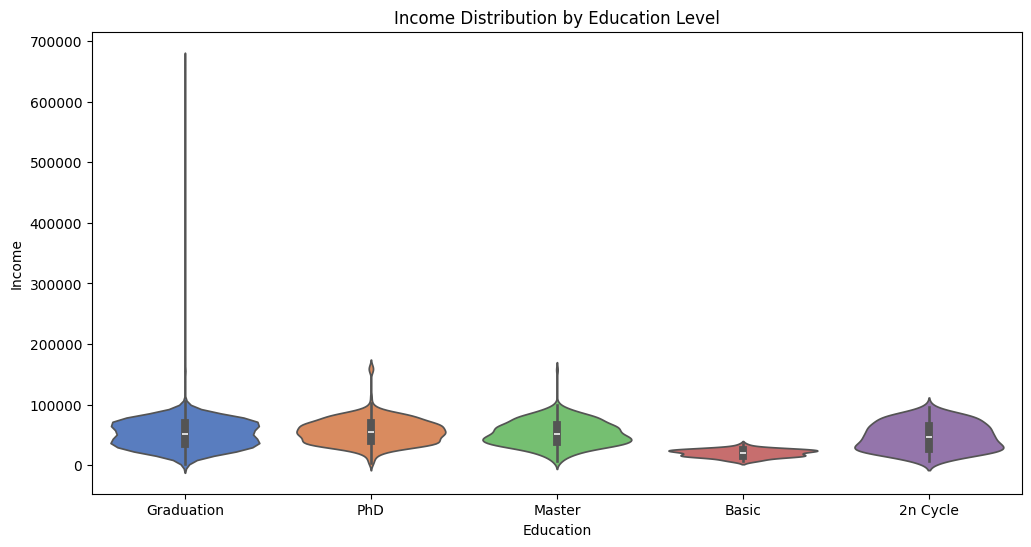

In [39]:
plt.figure(figsize=(12, 6))
sns.violinplot(x="Education", y="Income", data=df, hue="Education", palette="muted", legend=False)  # Assign 'Education' to hue and set legend=False
plt.title("Income Distribution by Education Level")
plt.show()

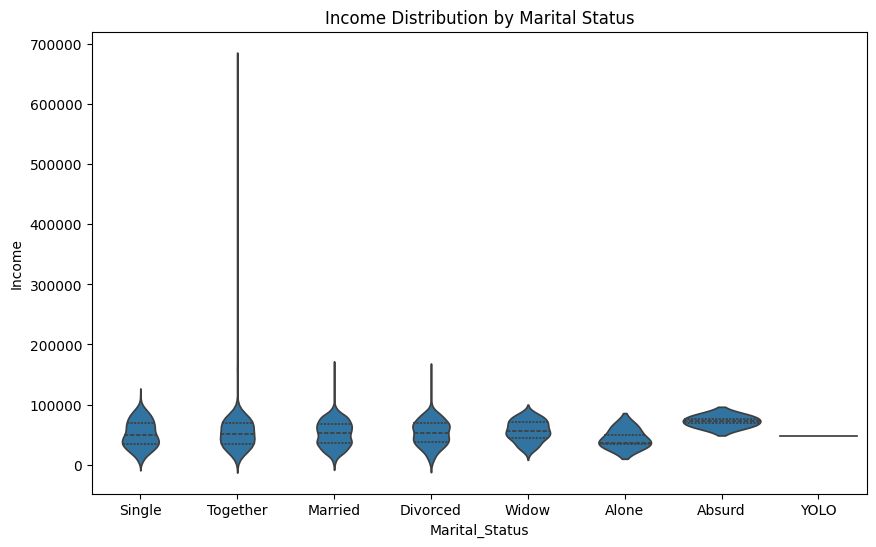

In [40]:
plt.figure(figsize=(10, 6))
sns.violinplot(x="Marital_Status", y="Income", data=df, inner="quart")
plt.title("Income Distribution by Marital Status")
plt.show()


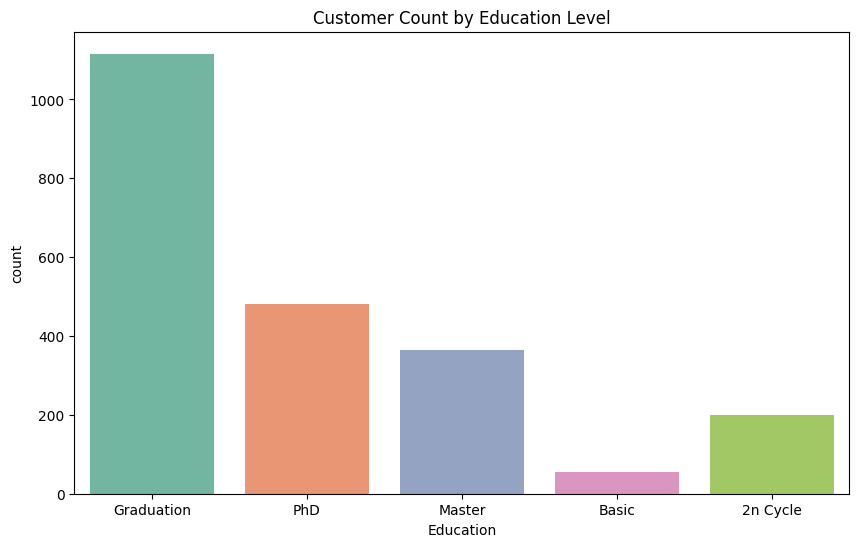

In [41]:
plt.figure(figsize=(10, 6))
sns.countplot(x="Education", data=df, hue="Education", palette="Set2", legend=False)  # Assign 'Education' to hue and set legend=False
plt.title("Customer Count by Education Level")
plt.show()

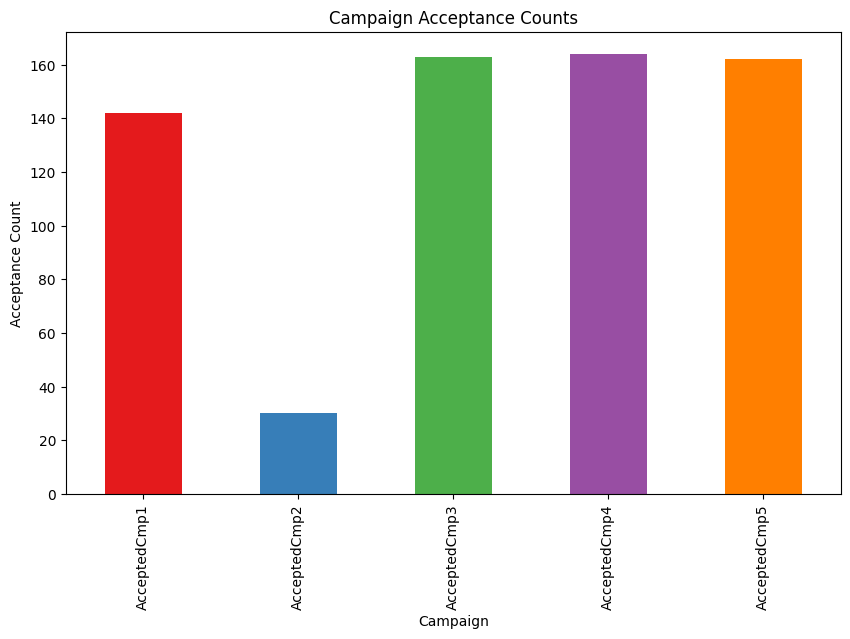

In [42]:
campaign_cols = ["AcceptedCmp1", "AcceptedCmp2", "AcceptedCmp3", "AcceptedCmp4", "AcceptedCmp5"]
df_campaign = df[campaign_cols].sum()

plt.figure(figsize=(10, 6))
df_campaign.plot(kind="bar", stacked=True, color=sns.color_palette("Set1", n_colors=5))
plt.title("Campaign Acceptance Counts")
plt.xlabel("Campaign")
plt.ylabel("Acceptance Count")
plt.show()


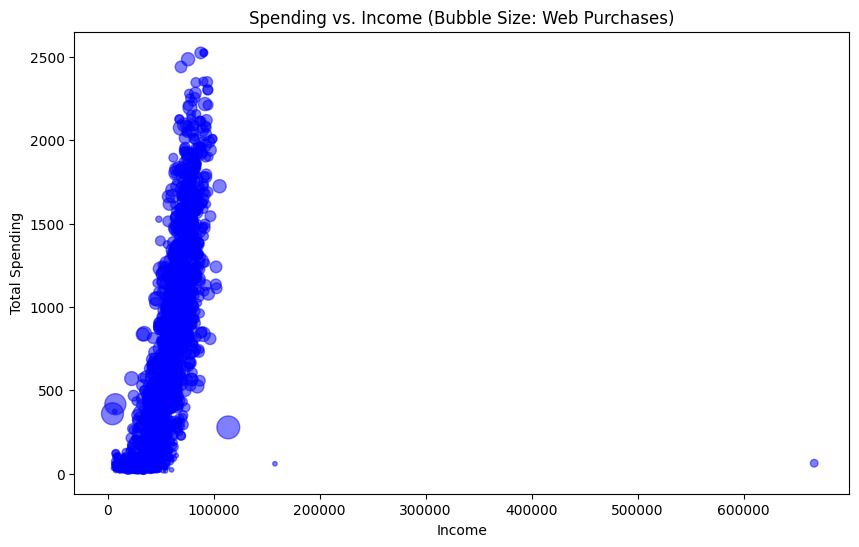

In [43]:
df["Total_Spending"] = df["MntWines"] + df["MntFruits"] + df["MntMeatProducts"] + df["MntFishProducts"] + df["MntSweetProducts"] + df["MntGoldProds"]


plt.figure(figsize=(10, 6))
plt.scatter(x=df["Income"], y=df["Total_Spending"], s=df["NumWebPurchases"]*10, alpha=0.5, color="b")
plt.title("Spending vs. Income (Bubble Size: Web Purchases)")
plt.xlabel("Income")
plt.ylabel("Total Spending")
plt.show()

## Feature Engineering ##

In [44]:
# Handle data columns

# Convert Dt_Customer to datetime
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'])

# Create new feature: Number of days as customer
df['Customer_Tenure'] = (pd.Timestamp.today() - df['Dt_Customer']).dt.days


In [45]:
# Remove columns which are not needed for clustering

print(df.columns.tolist())


['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome', 'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response', 'Total_Spending', 'Customer_Tenure']


ID and Dt_customer are already dropped.

In [46]:
# New combined features

# Total amount spent
df['Total_Spend'] = df[['MntWines', 'MntFruits', 'MntMeatProducts',
                        'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']].sum(axis=1)

# Total accepted campaigns
df['Total_Accepted_Campaigns'] = df[['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3',
                                     'AcceptedCmp4', 'AcceptedCmp5']].sum(axis=1)


In [47]:
# Encode Categorical Variables

# Convert categorical data into numerical format using one-hot encoding.
df = pd.get_dummies(df, drop_first=True)


In [48]:
# Normalize Numerical Features
# Clustering works best with scaled data.

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
numerical_features = df.select_dtypes(include=['number']).columns
scaled_df = pd.DataFrame(scaler.fit_transform(df[numerical_features]),
                         columns=numerical_features,
                         index=df.index)


In [49]:
print(scaled_df.head())
print(scaled_df.shape)


         ID  Year_Birth    Income   Kidhome  Teenhome   Recency  MntWines  \
0 -0.019809   -0.986443  0.234063 -0.823039 -0.928972  0.310532  0.978226   
1 -1.051009   -1.236801 -0.234559  1.039938  0.909066 -0.380509 -0.872024   
2 -0.445526   -0.318822  0.769478 -0.823039 -0.928972 -0.795134  0.358511   
3  0.182737    1.266777 -1.017239  1.039938 -0.928972 -0.795134 -0.872024   
4 -0.081373    1.016420  0.240221  1.039938 -0.928972  1.554407 -0.391671   

   MntFruits  MntMeatProducts  MntFishProducts  ...  AcceptedCmp1  \
0   1.549429         1.690227         2.454568  ...     -0.261661   
1  -0.637328        -0.717986        -0.651038  ...     -0.261661   
2   0.569159        -0.178368         1.340203  ...     -0.261661   
3  -0.561922        -0.655551        -0.504892  ...     -0.261661   
4   0.418348        -0.218505         0.152766  ...     -0.261661   

   AcceptedCmp2  Complain  Z_CostContact  Z_Revenue  Response  Total_Spending  \
0     -0.117148 -0.097812            0.0 

## Data Modeling ##

### K- Means clustering ###

In [50]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Assuming 'scaled_df' is your preprocessed and scaled dataset
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans_labels = kmeans.fit_predict(scaled_df)  # Fixed the syntax here

# Evaluate
print("K-Means Silhouette Score:", silhouette_score(scaled_df, kmeans_labels))


K-Means Silhouette Score: 0.27674762454967766


### Hierarchical clustering ###


In [51]:
from sklearn.cluster import AgglomerativeClustering

hierarchical = AgglomerativeClustering(n_clusters=3)
hierarchical_labels = hierarchical.fit_predict(scaled_df)

print("Hierarchical Clustering Silhouette Score:", silhouette_score(scaled_df, hierarchical_labels))


Hierarchical Clustering Silhouette Score: 0.19347530107253122


### DBSCAN ( Density- based spatial clustering ) ###

In [52]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=2, min_samples=5)
dbscan_labels = dbscan.fit_predict(scaled_df)

# Remove noise points (-1) before scoring
mask = dbscan_labels != -1
if len(set(dbscan_labels)) > 1:
    print("DBSCAN Silhouette Score:", silhouette_score(scaled_df[mask], dbscan_labels[mask]))
else:
    print("DBSCAN did not find enough clusters.")




DBSCAN Silhouette Score: 0.14567947815104207


### Gaussian Mixture Model (GMM ) ###


In [53]:
from sklearn.mixture import GaussianMixture

gmm = GaussianMixture(n_components=3, random_state=42)
gmm_labels = gmm.fit_predict(scaled_df)

print("GMM Silhouette Score:", silhouette_score(scaled_df, gmm_labels))


GMM Silhouette Score: 0.28404156207317294


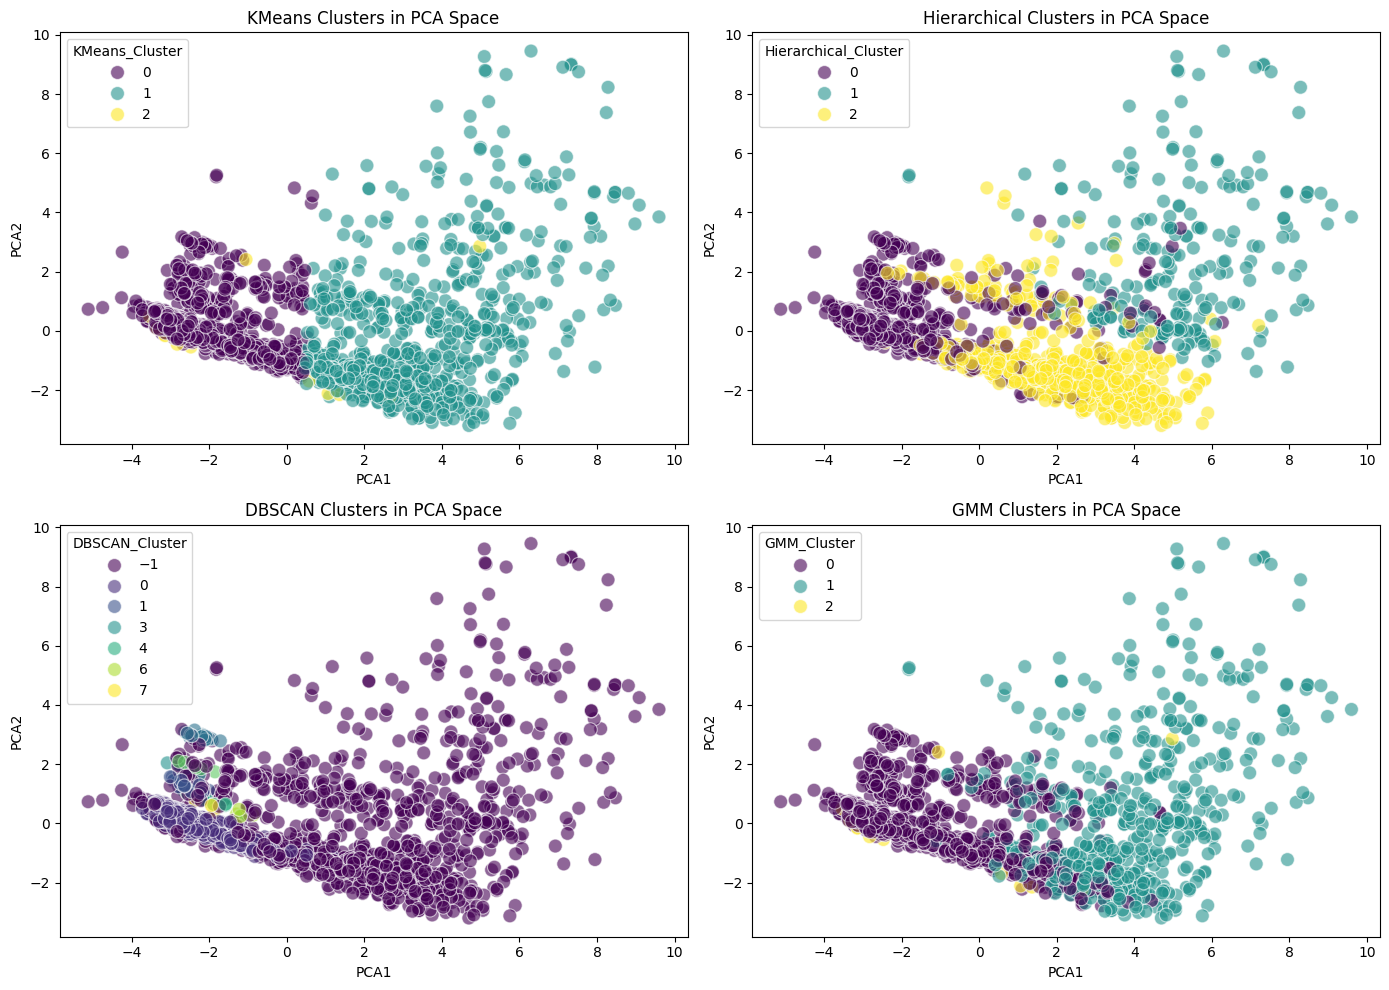

In [54]:
# PCA

from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Perform PCA to reduce the dimensionality to 2 components
pca = PCA(n_components=2)
pca_components = pca.fit_transform(scaled_df)

# Create a DataFrame with the PCA components for easier plotting
pca_df = pd.DataFrame(data=pca_components, columns=['PCA1', 'PCA2'])

# Add the cluster labels to the DataFrame for visualization
pca_df['KMeans_Cluster'] = kmeans_labels
pca_df['Hierarchical_Cluster'] = hierarchical_labels
pca_df['DBSCAN_Cluster'] = dbscan_labels
pca_df['GMM_Cluster'] = gmm_labels

# Plot the PCA components for each algorithm

plt.figure(figsize=(14, 10))

# KMeans Plot
plt.subplot(2, 2, 1)
sns.scatterplot(x='PCA1', y='PCA2', hue='KMeans_Cluster', data=pca_df, palette='viridis', s=100, alpha=0.6)
plt.title('KMeans Clusters in PCA Space')

# Hierarchical Plot
plt.subplot(2, 2, 2)
sns.scatterplot(x='PCA1', y='PCA2', hue='Hierarchical_Cluster', data=pca_df, palette='viridis', s=100, alpha=0.6)
plt.title('Hierarchical Clusters in PCA Space')

# DBSCAN Plot
plt.subplot(2, 2, 3)
sns.scatterplot(x='PCA1', y='PCA2', hue='DBSCAN_Cluster', data=pca_df, palette='viridis', s=100, alpha=0.6)
plt.title('DBSCAN Clusters in PCA Space')

# GMM Plot
plt.subplot(2, 2, 4)
sns.scatterplot(x='PCA1', y='PCA2', hue='GMM_Cluster', data=pca_df, palette='viridis', s=100, alpha=0.6)
plt.title('GMM Clusters in PCA Space')

plt.tight_layout()
plt.show()


In [55]:
# Macking pickle file for deployment
import pickle

# Chossing the one that performed best
model_to_save = DBSCAN # DBSCAN

with open ('DBSCAN.pkl','wb') as file:
    pickle.dump(model_to_save,file)
with open('scaler.pkl', 'wb') as f:
    pickle.dump(scaler, f)